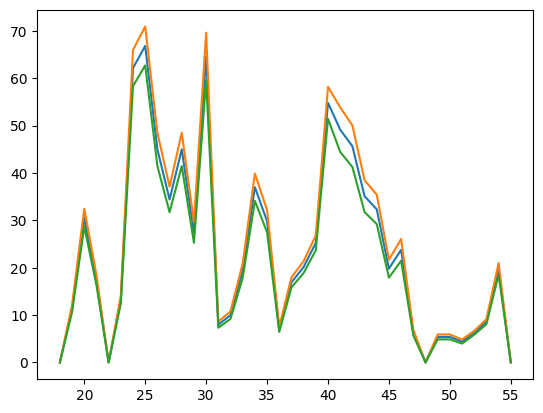

In [8]:
from base import *
from kfspeed import *
import matplotlib.pyplot as plt
GPSTime, DeviceTime, GPSSpeed, OBDSpeed, Longitude, Latitude, Bearing = values('data1.csv')
dGPS = 30
dOBD = 30
speed = []
kf = KF1(dOBD,dGPS)
for k in range(len(GPSTime)):
    dGPS = GPSSpeed[k]/10
    dOBD = OBDSpeed[k*10]/10
    if (k - 15)//60 >= 25-18 and (k - 15)//60 <= 35-18:
        kf.updatedisp(dOBD,999999999999999)
    elif (k - 15)//60 >= 40-18 and (k - 15)//60 <= 50-18:
        kf.updatedisp(999999999999999,dGPS)
    elif (k - 15)//60 >= 35-18 and (k - 15)//60 <= 40-18 or (k - 15)//60 >= 50-18 or (k - 15)//60 <= 25-18:
        kf.updatedisp(dOBD, dGPS)
    #('GPS time:',GPSTime[k],'OBD time:',DeviceTime[k*10])
    kf.predict()
    kf.sensGPS(GPSSpeed[k])
    speed.append(kf.sensOBD(OBDSpeed[k*10]))
    for i in range(1,10):
        try:
            dGPS = GPSSpeed[k] / 10
            dOBD = OBDSpeed[k*10+i] / 10
            if (k - 15) // 60 >= 25 - 18 and (k - 15) // 60 <= 35 - 18:
                kf.updatedisp(dOBD, 999999999999999)
            elif (k - 15) // 60 >= 40 - 18 and (k - 15) // 60 <= 50 - 18:
                kf.updatedisp(999999999999999, dGPS)
            elif (k - 15) // 60 >= 35 - 18 and (k - 15) // 60 <= 40 - 18 or (k - 15) // 60 >= 50 - 18 or (k - 15)//60 <= 25-18:
                kf.updatedisp(dOBD, dGPS)
            kf.predict()
            speed.append(kf.sensOBD(OBDSpeed[k*10+i]))
        except IndexError:
            continue

speed = np.array(speed)


pointx = [DeviceTime[i]/60 + 18 for i in range(0,len(DeviceTime),600)]
pointy = [[speed[i,0] + speed[i,1],speed[i,0] - speed[i,1]] for i in range(0,len(DeviceTime),600)]
pointy2 = [speed[i,0] for i in range(0,len(DeviceTime),600)]
plt.plot(pointx, pointy2)
plt.plot(pointx,pointy)
plt.show()


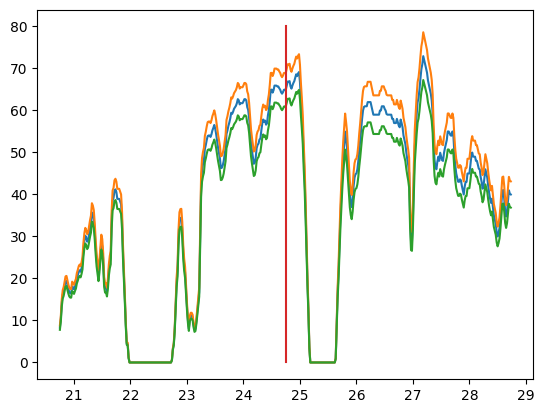

In [23]:
time = 600*4
isl = 25
plotx = [DeviceTime[i]/60 + 18 for i in range(((isl-18)*60 - 15)*10-time,((isl-18)*60 - 15)*10+time,10)]
ploty = [speed[i,0] for i in range(((isl-18)*60 - 15)*10-time,((isl-18)*60 - 15)*10+time,10)]
ploty2 = [[speed[i,0] + speed[i,1],speed[i,0] - speed[i,1]] for i in range(((isl-18)*60 - 15)*10-time,((isl-18)*60 - 15)*10+time,10)]
plotx2 = [DeviceTime[i]/60 + 18 for i in range(((isl-18)*60 - 15)*10-time,((isl-18)*60 - 15)*10+time,10)]
plt.plot(plotx,ploty)
plt.plot(plotx2,ploty2)
plt.plot([DeviceTime[((isl-18)*60 - 15)*10]/60 + 18 ,DeviceTime[((isl-18)*60 - 15)*10]/60 + 18 ],[0,80])
plt.show()

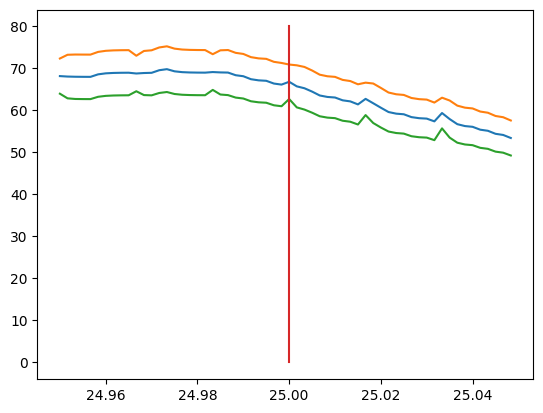

In [34]:
time = 30*1
isl = 25
rangeleft = int(((isl-18)*60)*10-time)
rangeright = int(((isl-18)*60)*10+time)
plotx = [DeviceTime[i]/60 + 18 for i in range(rangeleft,rangeright)]
ploty = [speed[i,0] for i in range(rangeleft,rangeright)]
ploty2 = [[speed[i,0] + speed[i,1],speed[i,0] - speed[i,1]] for i in range(rangeleft,rangeright)]
plotx2 = [DeviceTime[i]/60 + 18 for i in range(rangeleft,rangeright)]
plt.plot(plotx,ploty)
plt.plot(plotx2,ploty2)
plt.plot([DeviceTime[int(((isl-18)*60)*10)]/60 + 18 ,DeviceTime[int(((isl-18)*60)*10)]/60 + 18 ],[0,80])
plt.show()